<a href="https://colab.research.google.com/github/Roger8886/Prediction-of-quality-of-Wine/blob/main/%E5%B0%88%E9%A1%8C%E5%AF%A6%E4%BD%9C_02%EF%BC%9A%E7%B4%85%E9%85%92%E5%93%81%E8%B3%AA%E5%88%86%E9%A1%9E%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#環境準備

In [1]:
import pandas as pd
import numpy as np

#載入資料

In [2]:
url_wine = "https://github.com/Roger8886/Prediction-of-quality-of-Wine/raw/main/winequality-red.csv"
wine = pd.read_csv(url_wine)
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


 請瞭解該資料中所有欄位的定義為何？

In [3]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

各欄位定義如下

*   fixed acidity：非揮發性酸
*   volatile acidity：揮發性酸
*   citric acid：檸檬酸
*   residual sugar：剩餘糖分
*   chlorides：氯化物
*   free sulfur dioxide：游離二氧化硫
*   total sulfur dioxide：總二氧化硫
*   density：密度
*   pH：酸鹼值
*   sulphates：硫酸鹽
*   alcohol：酒精濃度
*   quality：質量











檢視每個數值型欄位值的範圍是否相同

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

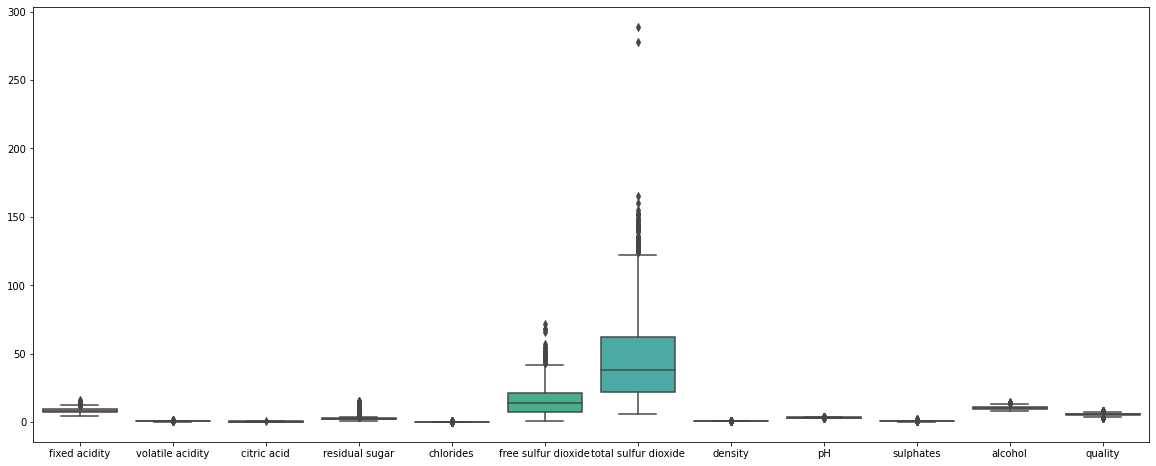

In [5]:
# 箱型圖
plt.figure(figsize = (20, 8))
sns.boxplot(data = wine, width = 0.8)
plt.show()

大部分欄位的範圍相近，free sulfur dioxide、total sulfur dioxide兩欄位的範圍比較寬



進一步觀察其他「數值欄位/類別欄位」的屬性與「quality」之關係程度，找出關係大的欄位

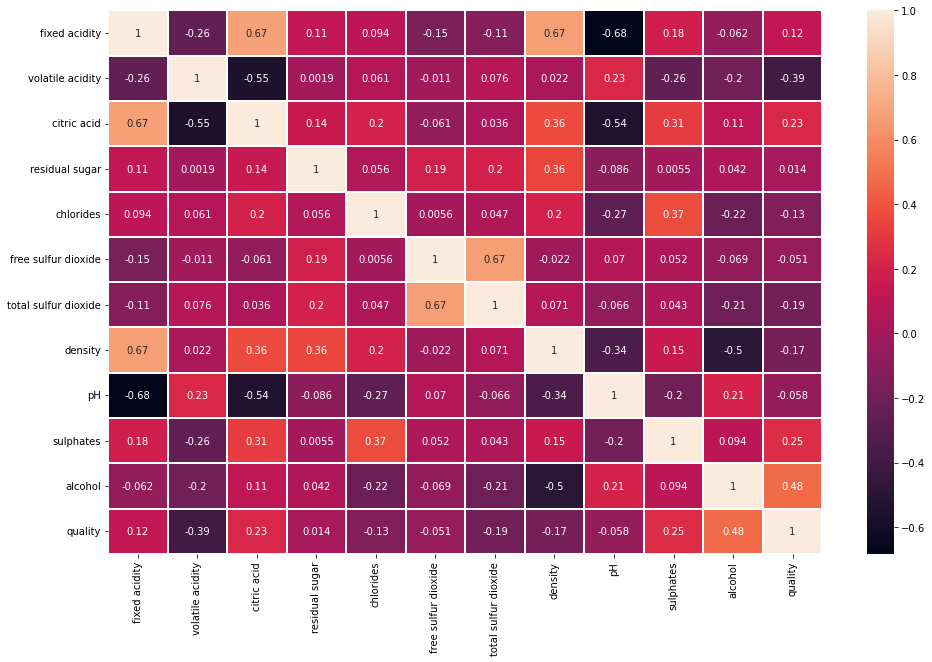

In [6]:
fig, ax = plt.subplots(figsize = (16, 10))
sns.heatmap(wine.corr(), annot = True, linewidth = 1)
plt.show()

跟quality相關程度比較高的欄位有：volatile acidity、alcohol

檢查資料分為「good」和「bad」後，是否有資料不平衡問題？

In [7]:
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

quality為5跟6的數據佔大部分比例，quality為3跟4的數據只有一點點，如果將quality=5以上劃分為good，quality=4以下歸類為bad，會有資料不平衡的情形。

請進行「必要」的資料前處理操作，讓資料變成可以跑得動模型的格式即可

In [8]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


請問資料中有哪些「欄位」你覺得是多餘的，在分析過程中應該被排除的呢？為什麼？

從上面資料觀察發現，density欄位在min、25%、50%、75%的值都在0.99左右，表示此欄位對於quality的預測無太大影響，因此先將density欄位排除。


In [9]:
#dropped 'density' column
wine.drop(labels='density', axis=1, inplace=True)


In [10]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   pH                    1599 non-null   float64
 8   sulphates             1599 non-null   float64
 9   alcohol               1599 non-null   float64
 10  quality               1599 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 137.5 KB


In [11]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

所有數據的數值為1599，所以沒有缺失值。

檢查各欄位中是否有異常值

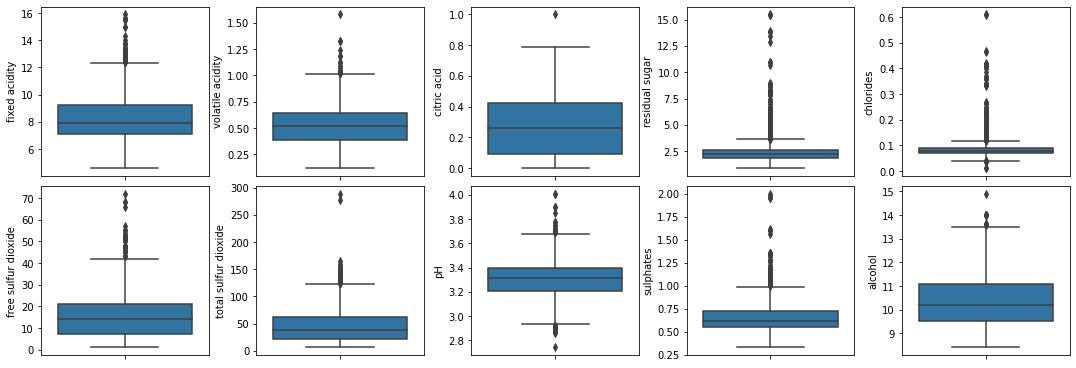

In [12]:
#Plotting boxplots to see if there are any outliers in our data (considering data betwen 25th and 75th percentile as non outlier)
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(15, 5))
ax = ax.flatten()
index = 0
for i in wine.columns:
  if i != 'quality':
    sns.boxplot(y=i, data=wine, ax=ax[index])
    index +=1
plt.tight_layout(pad=0.4)
plt.show()

#特徵提取

<function matplotlib.pyplot.show>

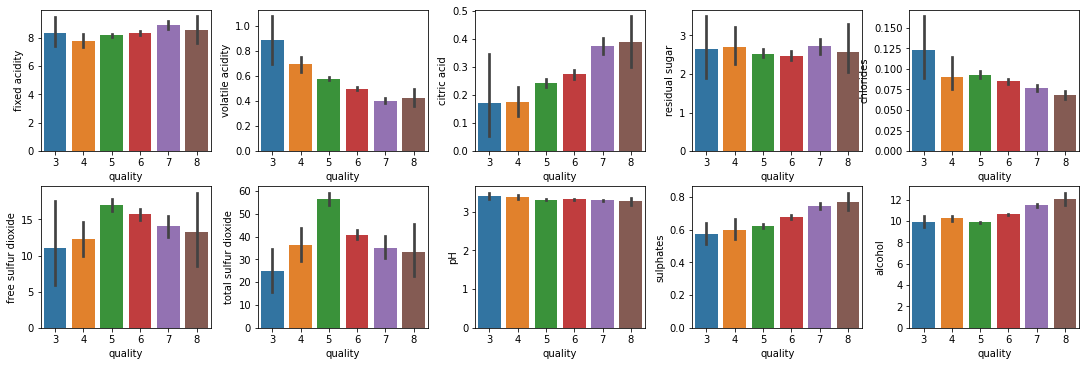

In [14]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(15, 5))
ax = ax.flatten()
index=0
for i in wine.columns:
  if i != 'quality':
    sns.barplot(x='quality', y=i, data=wine, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.4)
plt.show

In [17]:
#for another view, this method can be used to view correlations
print('Another view of correlations among features:\n')
wine.corr().style.background_gradient(cmap="coolwarm")

Another view of correlations among features:



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,-0.066495,0.042947,-0.205654,-0.185100
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,-0.196648,1.000000,0.093595,0.251397
alcohol,-0.061668,-0.202288,0.109903,0.042075,-0.221141,-0.069408,-0.205654,0.205633,0.093595,1.000000,0.476166


請你嘗試不同的特徵工程手法，產生可以幫助分析結果的新變數。

依照紅酒品質，將紅酒分為good wine及bad wine

*   Bad wine : range 2 – 6.5
*   Good wine : range 6.5 – 8



In [18]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,bad


In [19]:
wine['quality'] = wine['quality'].map({'bad' : 0, 'good' : 1})
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,3.35,0.80,10.5,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


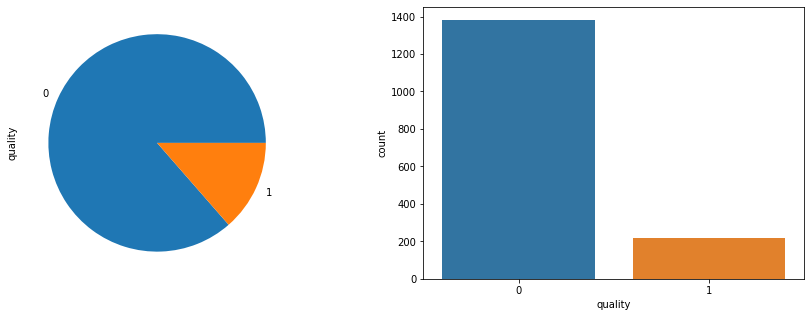

In [21]:
wine['quality'].value_counts()
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15, 5))
ax = ax.flatten()
wine['quality'].value_counts().plot(x=0, y=1, kind='pie', figsize=(15,5), ax=ax[0])
sns.countplot(wine['quality'], ax=ax[1])
plt.show()

最後請將資料接著執行下方範例，看看能否產出結果

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = wine.drop('quality', axis = 1)
y = wine['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
rfc = RandomForestClassifier(n_estimators=200)
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 5)
rfc_eval

array([0.875     , 0.91796875, 0.8828125 , 0.9296875 , 0.91764706])

#模型優化與比較

請嘗試使用 scikit-learn 中「不同基本分類模型」，並且進行比較結果？

In [24]:
# machine learning
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

In [27]:
# logistic regression 
log = LogisticRegression(random_state=0)
scores_1 = cross_val_score(log, X_train, y_train.values.ravel(),cv=5,scoring='accuracy').mean()

# Support Vector Machines
svc = SVC()
scores_2 = cross_val_score(svc, X_train, y_train.values.ravel(),cv=5,scoring='accuracy').mean()

# Decision Tree
decision_tree = DecisionTreeClassifier()
scores_3 = cross_val_score(decision_tree, X_train, y_train.values.ravel(),cv=5,scoring='accuracy').mean()

# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
scores_4 = cross_val_score(knn, X_train, y_train.values.ravel(),cv=5,scoring='accuracy').mean()

# Gaussian Naive Baye
gaussian = GaussianNB()
scores_5 = cross_val_score(gaussian, X_train, y_train.values.ravel(),cv=5,scoring='accuracy').mean()

# RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
scores_6 = cross_val_score(rf, X_train, y_train.values.ravel(),cv=5,scoring='accuracy').mean()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [28]:
models = pd.DataFrame({
    'Model': ['Logistic Regression',
              'Support Vector Machines',
              'Decision Tree',
              'KNN',  
              'Naive Bayes',
              'RandomForestClassifier' ],
    'Score': [scores_1, scores_2, scores_3, scores_4, scores_5, scores_6]})

models

,Model,Score
0,Logistic Regression,0.881161
1,Support Vector Machines,0.867083
2,Decision Tree,0.862399
3,KNN,0.865515
4,Naive Bayes,0.841281
5,RandomForestClassifier,0.906973


可以利用「sklearn.model_selection 下的 GridSearchCV(...)」進行參數的調整

In [30]:
from sklearn.model_selection import GridSearchCV

svc = SVC()
Parameters = {
    'C' : [ 1.5, 2, 2.5],
    'gamma' : [0.05,0.1],
    'kernel' : ['rbf']
}

clf= GridSearchCV(svc, Parameters, cv = 5, n_jobs = 6)
clf.fit(X_train, y_train)
print(clf.best_params_)
# Result: C = 2, gamma = 0.1 if using Gaussian Kernel

scores_7 = cross_val_score(svc, X_train, y_train.values.ravel(), cv=5,scoring='accuracy').mean()
print(scores_7)

{'C': 1.5, 'gamma': 0.05, 'kernel': 'rbf'}
0.8670833333333334


In [31]:
rf = RandomForestClassifier(n_estimators=100)
Parameters = {
  'max_depth' : [6, 8],
  'n_estimators': [50, 10],
  'max_features': ['sqrt', 'auto'],
  'min_samples_split': [3, 10],
  'min_samples_leaf': [3, 10],
  'bootstrap': [True, False],
}

rf = GridSearchCV(rf, Parameters,cv = 5)
scores_8 = cross_val_score(rf, X_train, y_train.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_8)

0.8960324754901962


In [32]:
models = pd.DataFrame({
    'Model': ['Logistic Regression',
              'Support Vector Machines',
              'Decision Tree',
              'KNN',  
              'Naive Bayes',
              'RandomForestClassifier',
              'Support Vector Machines  (Opt)',
              'RandomForestClassifier (Opt)'
              ],
    'Score': [scores_1, scores_2, scores_3, scores_4, scores_5, scores_6, scores_7, scores_8]})

models

,Model,Score
0,Logistic Regression,0.881161
1,Support Vector Machines,0.867083
2,Decision Tree,0.862399
3,KNN,0.865515
4,Naive Bayes,0.841281
5,RandomForestClassifier,0.906973
6,Support Vector Machines (Opt),0.867083
7,RandomForestClassifier (Opt),0.896032


#使用PyTorch套件分析

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

import tensorflow as tf
y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test_onehot = tf.keras.utils.to_categorical(y_test, num_classes=2)

print(y_train_onehot.shape)
print(y_test_onehot.shape)

(1023, 10)
(1023,)
(256, 10)
(256,)
(1023, 2)
(256, 2)


In [35]:
import torch
import torch.nn.functional as F
from sklearn.metrics import accuracy_score

# 創建模型架構
class Model(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Model, self).__init__()
        self.hidden1 = torch.nn.Linear(input_size, hidden_size)
        self.hidden2 = torch.nn.Linear(hidden_size, hidden_size)
        self.predict = torch.nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        output1 = self.hidden1(x)
        output2 = self.hidden2(output1)
        output = F.softmax(self.predict(output2))
        return output

# 模型、優化器初始化
model = Model(X_test.shape[1], 32, 2)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.0) # 模型參數優化器
loss_func = torch.nn.CrossEntropyLoss()


# 資料格式轉成torch專用格式
x_data = torch.tensor(X_train.values, dtype=torch.float32) # [120, 4]
y_data = torch.tensor(y_train_onehot, dtype=torch.float32) # [120, 3]
x_test_data = torch.tensor(X_test.values, dtype=torch.float32) # [120, 4]
y_test_data = torch.tensor(y_test_onehot, dtype=torch.float32) # [120, 3]


batch_size = 16
num_epochs = 100
num_batches = len(X_train) // batch_size
loss_list = []
test_loss_list = []

for epoch in range(num_epochs):
    for i in range(num_batches):
        start = i * batch_size
        end = start + batch_size
        prediction = model(x_data[start:end])
        loss = loss_func(prediction, y_data[start:end])

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    loss = loss_func(model(x_data), y_data)
    loss_list.append(loss.item())

    test_loss = loss_func(model(x_test_data), y_test_data)
    test_loss_list.append(test_loss.item())

    # print(loss)

print(' ===== done =====')

print(loss_list)
print(test_loss_list)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


 ===== done =====
[0.44853416085243225, 0.4484870731830597, 0.4484512507915497, 0.44842299818992615, 0.4484000504016876, 0.4483811855316162, 0.44836515188217163, 0.44835156202316284, 0.44833970069885254, 0.4483294188976288, 0.44832029938697815, 0.4483121931552887, 0.4483048915863037, 0.4482983648777008, 0.4482923746109009, 0.4482869803905487, 0.44828203320503235, 0.44827744364738464, 0.44827327132225037, 0.4482693672180176, 0.44826576113700867, 0.44826239347457886, 0.4482593238353729, 0.44825634360313416, 0.4482535421848297, 0.4482509195804596, 0.4482485353946686, 0.44824621081352234, 0.44824400544166565, 0.4482419490814209, 0.4482400119304657, 0.44823816418647766, 0.4482363760471344, 0.4482346475124359, 0.44823306798934937, 0.4482315480709076, 0.4482300579547882, 0.448228657245636, 0.44822731614112854, 0.4482260048389435, 0.4482247531414032, 0.4482235610485077, 0.44822239875793457, 0.4482212960720062, 0.44822022318840027, 0.4482192099094391, 0.4482182264328003, 0.4482172727584839, 0.4

Text(0, 0.5, 'BCE Loss')

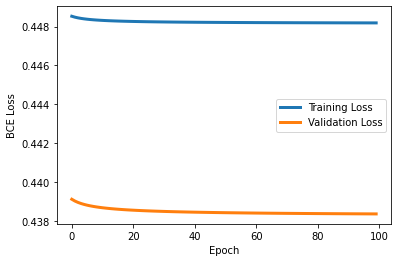

In [36]:
import matplotlib.pyplot as plt
plt.plot(loss_list, linewidth=3)
plt.plot(test_loss_list, linewidth=3)
plt.legend(("Training Loss", "Validation Loss"))
plt.xlabel("Epoch")
plt.ylabel("BCE Loss")

In [37]:
x_test_data = torch.tensor(X_test.values, dtype=torch.float32)
y_pred = model(x_test_data)
y_pred = y_pred.argmax(1) # one hot array to int array
accuracy_score(y_test, y_pred.detach().numpy()) # accuracy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


0.875